### 3x3のフィルタ
$$ G(x, y) = \frac{1}{\sqrt{2\pi} \sigma} exp ( - \frac{x^2 + y^2}{2\sigma^2})$$
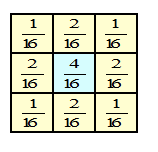 

|  |  |  |  
|:-- : |:-- : |:-- : |  
| (-1, -1) | (0, -1) | (1, -1) |  
| (-1, 0)  | (0, 0) | (1, 0)  |  
| (-1, 1)  | (0, 1) | (1, 1) |  

### フーリエ領域のフィルタに変換

$$ \mathbb{F}[G(x, y)] = \sqrt{2\pi } \sigma exp \{ - \frac{\pi^2 \sigma^2}{2}(u^2 + v^2) \}$$

|  |  |  |  
|:-- : |:-- : |:-- : |  
| (-1, -1) | (0, -1) | (1, -1) |  
| (-1, 0)  | (0, 0) | (1, 0)  |  
| (-1, 1)  | (0, 1) | (1, 1) |  

In [2]:
import numpy as np

Sigma = 1.3
X, Y = np.meshgrid(np.arange(-1, 2), np.arange(-1, 2))

def F(u, v):
    return np.sqrt(2 * np.pi) * Sigma * np.exp(- (np.pi * Sigma)**2 * (u**2 + v**2)) 
                                               
Z = np.vectorize(F)(X, Y)
Z

array([[1.05996006e-14, 1.85849498e-07, 1.05996006e-14],
       [1.85849498e-07, 3.25861676e+00, 1.85849498e-07],
       [1.05996006e-14, 1.85849498e-07, 1.05996006e-14]])

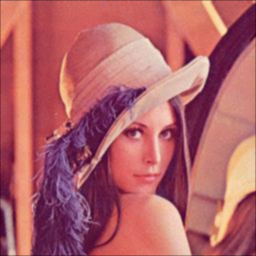

In [6]:
from IPython.display import Image 
import numpy as np
from PIL import Image
from scipy.signal import fftconvolve

img = Image.open('lena.png')
img_array = np.asarray(img).transpose(2, 0, 1)

# 3x3のガウシアンフィルタ
G_3x3 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16
out_by3x3 = np.zeros(img_array.shape)
for i in range(out_by3x3.shape[0]):
    out_by3x3[i] = fftconvolve(img_array[i], G_3x3, mode='same')

out_img_by3x3 = Image.fromarray(np.uint8(out_by3x3.transpose(1, 2, 0)))
display(out_img_by3x3)

### 戻してみた

In [8]:
recover_img = np.zeros(out_by3x3.shape)
for i in range(out_by3x3.shape[0]):
    recover_img[i] = fftconvolve(out_by3x3[i], Z, mode='same')

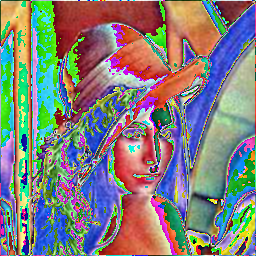

In [9]:
ri = Image.fromarray(np.uint8(recover_img.transpose(1, 2, 0)))
display(ri)

### なんじゃこりゃ

そりゃそうか、画像自体をフーリエ変換しないと